In [1]:
import fxcmpy
import pandas as pd
import plotly.express as px
import datetime as dt
import numpy as np
import backtrader

In [2]:
con = fxcmpy.fxcmpy(config_file='fxcm.cfg', server='demo') # server = 'real' for live

In [3]:
instruments = con.get_instruments()
print(instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'USDOLLAR', 'US2000', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'WHEATF', 'CORNF', 'Bund', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'BTC/USD', 'BCH/USD', 'ETH/USD', 'LTC/USD', 'XRP/USD', 'CryptoMajor', 'USEquities']


## Getting historical data

In [4]:
start_dt = dt.datetime(2019, 12, 23)
stop_dt = dt.datetime(2019, 12, 24)

data = con.get_candles('EUR/GBP', period='m1', start = start_dt, stop = stop_dt)  # daily data
data

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2019-12-23 00:00:00,0.85182,0.85177,0.85190,0.85175,0.85207,0.85203,0.85215,0.85202,170
2019-12-23 00:02:00,0.85168,0.85176,0.85176,0.85166,0.85194,0.85203,0.85203,0.85193,92
2019-12-23 00:03:00,0.85176,0.85168,0.85176,0.85168,0.85203,0.85194,0.85202,0.85193,35
2019-12-23 00:04:00,0.85168,0.85144,0.85177,0.85144,0.85194,0.85171,0.85202,0.85170,136
2019-12-23 00:05:00,0.85144,0.85143,0.85149,0.85138,0.85171,0.85169,0.85175,0.85164,99
...,...,...,...,...,...,...,...,...,...
2019-12-23 23:56:00,0.85691,0.85693,0.85694,0.85684,0.85717,0.85718,0.85718,0.85709,57
2019-12-23 23:57:00,0.85693,0.85695,0.85702,0.85691,0.85718,0.85719,0.85725,0.85715,77
2019-12-23 23:58:00,0.85695,0.85689,0.85696,0.85689,0.85719,0.85713,0.85719,0.85713,30


In [5]:
data['pandas_SMA_3'] = data["askclose"].rolling(window=3).mean()
data['pandas_SMA_50'] = data["askclose"].rolling(window=50).mean()

data.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,pandas_SMA_3,pandas_SMA_50
date,,,,,,,,,,,
2019-12-23 00:00:00,0.85182,0.85177,0.85190,0.85175,0.85207,0.85203,0.85215,0.85202,170,NaN,NaN
2019-12-23 00:02:00,0.85168,0.85176,0.85176,0.85166,0.85194,0.85203,0.85203,0.85193,92,NaN,NaN
2019-12-23 00:03:00,0.85176,0.85168,0.85176,0.85168,0.85203,0.85194,0.85202,0.85193,35,0.852000,NaN
2019-12-23 00:04:00,0.85168,0.85144,0.85177,0.85144,0.85194,0.85171,0.85202,0.85170,136,0.851893,NaN
2019-12-23 00:05:00,0.85144,0.85143,0.85149,0.85138,0.85171,0.85169,0.85175,0.85164,99,0.851780,NaN


<function matplotlib.pyplot.show(*args, **kw)>

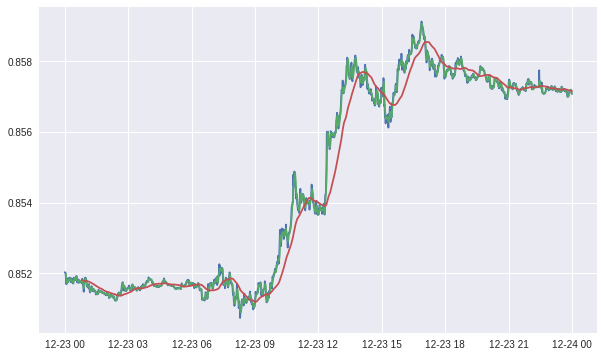

In [6]:
from pylab import plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.style.use('seaborn')
plt.figure(figsize = (10,6))
plt.plot(data['askclose'])
plt.plot(data['pandas_SMA_3'])
plt.plot(data['pandas_SMA_50'])
plt.show

## Subscribe to live data

In [7]:
con.subscribe_market_data('EUR/CHF')

In [8]:
con.get_subscribed_symbols()

['EUR/CHF']

In [9]:
con.is_subscribed('EUR/CHF')

True

In [10]:
con.get_last_price('EUR/CHF')

Bid     1.06873
Ask     1.06893
High    1.07254
Low     1.06804
Name: 2020-01-30 16:17:50.464000, dtype: float64

In [11]:
con.unsubscribe_market_data('EUR/CHF')
print("unsubcribed")

unsubcribed
